In [1]:
#初期化する
import math as m
import matplotlib.pyplot as plt
import numpy as np
import decimal
import random
alpha = 2 
a = []
theta_ = np.array([3,1])
ep = 0.01
#8個の行動の特徴量
for i in range(8):
    a1 = np.cos(i*m.pi/4)
    a2 = np.sin(i*m.pi/4)
    a_i = [a1,a2]
    a_i[0] = float(decimal.Decimal(a_i[0]).quantize(decimal.Decimal('0.01')))
    a_i[1] = float(decimal.Decimal(a_i[1]).quantize(decimal.Decimal('0.01')))
    a.append(a_i)
a = np.array(a)
#報酬を計算する
r = list(np.dot(a,theta_))
r_ = max(r)
r_max = r.index(r_)
r = np.array(r)

In [2]:
#linucb、thompson sampling、epsilon greedy　アルゴリズムを定義する。
def linucb(alpha,a,theta_,r,r_max):
    A = np.identity(2)
    A_I = np.linalg.inv(A)
    b = np.zeros(2)
    reg = 0
    R = []
    R_mean = []
    for i in range(10000):
        ucb = []
        for d in range(8):
            w_i = np.dot(A_I,b)
            ucb_i = np.dot(a[d],w_i) + alpha*m.sqrt(np.dot(np.dot(a[d],A_I),a[d]))
            ucb.append(ucb_i)
        a_max = ucb.index(max(ucb))
        A += np.mat(a[a_max]).T*np.mat(a[a_max])
        A_I = np.linalg.inv(A)
        b += a[a_max]*r[a_max]
        reg += np.dot(a[r_max]-a[a_max], theta_)
        R.append(reg)
        if i % 100 == 0 and i != 0:
            mean_reg = np.mean(R)
            R_mean.append(mean_reg)
            R = []
    return R_mean, w_i

def thompson(a,theta_,r,r_max):
    A = np.identity(2)
    A_I = np.linalg.inv(A)
    b = np.zeros(2)
    reg = 0
    R = []
    R_mean = []
    for i in range(10000):
        mu = np.dot(A_I,b)
        sigma = A_I
        w = np.random.multivariate_normal(mu, sigma, size=1)
        w = w[0]
        at = list(np.dot(a,w))
        a_max = at.index(max(at))
        A += np.mat(a[a_max]).T*np.mat(a[a_max])
        A_I = np.linalg.inv(A)
        b += a[a_max]*r[a_max]
        reg += np.dot(a[r_max]-a[a_max], theta_)
        R.append(reg)
        if i % 100 == 0 and i != 0:
            mean_reg = np.mean(R)
            R_mean.append(mean_reg)
            R = []
    return R_mean, w

def epsilon_greedy(a, theta_,r,r_max,ep):
    A = np.identity(2)
    A_I = np.linalg.inv(A)
    b = np.zeros(2)
    reg = 0
    R = []
    R_mean = []
    w_j = np.array([0,0])
    for i in range(10000):
        ta = list(np.dot(a,w_j))
        if random.random() < ep:
            a_max = np.random.choice([n for n in range(8)])
        else:
            a_max = np.random.choice([n for n in range(8) if ta[n] == max(ta)])
        A += np.mat(a[a_max]).T*np.mat(a[a_max])
        A_I = np.linalg.inv(A)
        b += a[a_max]*r[a_max]
        w_j = np.dot(A_I,b)
        reg += np.dot(a[r_max]-a[a_max], theta_)
        R.append(reg)
        if i % 100 == 0 and i != 0:
            mean_reg = np.mean(R)
            R_mean.append(mean_reg)
            R = []
    return R_mean, w_j


In [3]:
REG_mean_linucb, w_linucb = linucb(alpha,a,theta_,r,r_max)
REG_mean_thompson, w_thompson = thompson(a,theta_,r,r_max)
REG_mean_greedy, w_greedy = epsilon_greedy(a,theta_,r,r_max,ep)

In [4]:
print(w_linucb)
print(w_thompson)
print(w_greedy)

[2.99979602 0.98182956]
[3.00962763 1.06740122]
[2.99970018 0.98221077]


まず、三つのアルゴリズムから導いた$\widehat\theta$をみる。
導いた$\widehat\theta$は$\theta^*=[3,1]$に近いである。

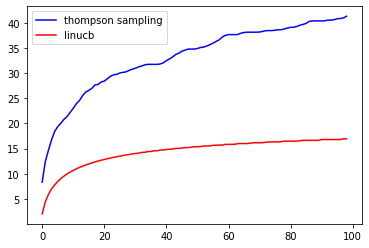

In [5]:
# linucbとthompson samplingアルゴリズムの学習曲線
plt.plot(range(99),REG_mean_thompson,color='blue', label = 'thompson sampling')
plt.plot(range(99),REG_mean_linucb,color='red', label = 'linucb')
plt.legend()

linucbとthompson samplingアルゴリズム学習曲線を見ると、LinUCBがthompson samplingより収束が早い、リグレットが小さい。

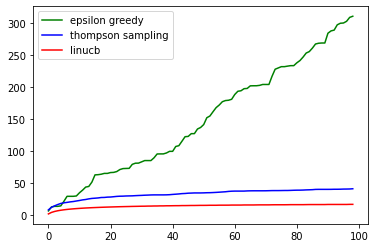

In [6]:
# linucb、thompson samplingと貪欲アルゴリズムの学習曲線
plt.plot(range(99),REG_mean_greedy,color='green', label = 'epsilon greedy')
plt.plot(range(99),REG_mean_thompson,color='blue', label = 'thompson sampling')
plt.plot(range(99),REG_mean_linucb,color='red', label = 'linucb')
plt.legend()

linucb、thompson samplingとepsilon greedyアルゴリズム学習曲線を見ると、linucbとthompson samplingの学習曲線はほぼ同じである。貪欲アルゴリズムは他の二つのアルゴリズムよりリグレットがすごく高いである。